<a href="https://colab.research.google.com/github/MartaAmoresCastillejo/PROYECTOINTEGRADORIII/blob/main/Final_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de habitaciones de hoteles

In [405]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
%matplotlib inline
plt.style.use('fivethirtyeight')

In [406]:
!pip install Faker
!pip install names


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [407]:
import pandas as pd
import numpy as np
from faker import Faker
import names

In [408]:
fake = Faker()

num_rows = 2000

In [409]:
piscina = np.random.choice(["NO", "SI"], num_rows)
estrellas = np.random.randint(1, 6, num_rows)
Kimc = np.random.choice(['MC', 'RC', 'L' ,'ML'], num_rows)
resenas = np.random.choice(["MALO", "REGULAR", "BUENO", "MUY BUENO"], num_rows)
tipocama = np.random.choice(['1D' ,'1D/2I','2I' ,'3I'], num_rows)
parking = np.random.choice(["NO", "SI"], num_rows)
met = np.random.randint(0, 120, num_rows)
terraza = np.random.choice(["NO", "SI"], num_rows)
puntointeres = np.random.uniform(0, 100, num_rows).astype(float)
aire = np.random.choice(["NO", "SI"], num_rows)
wifi = np.random.choice(["NO", "SI"], num_rows)

In [410]:
data = pd.DataFrame({
    "Kimc": Kimc,
    "Punto de interés": puntointeres,
    "Estrellas": estrellas,
    "M^2": met,
    "Tipo de cama":tipocama, 
    "Resenas": resenas,
    "Piscina": piscina,
    "Parking": parking,
    "Terraza": terraza,
    "Aire": aire,
    "Wifi": wifi
})

In [411]:
da = data.drop(['Tipo de cama', 'Punto de interés'], axis=1)
da

,Kimc,Estrellas,M^2,Resenas,Piscina,Parking,Terraza,Aire,Wifi
0,L,3,78,MUY BUENO,SI,SI,SI,NO,NO
1,RC,5,22,REGULAR,NO,SI,SI,SI,SI
2,L,5,3,BUENO,SI,SI,NO,SI,NO
3,L,2,111,REGULAR,NO,SI,SI,NO,NO
4,ML,1,86,REGULAR,SI,SI,NO,NO,SI
...,...,...,...,...,...,...,...,...,...
1995,MC,2,85,MUY BUENO,SI,NO,SI,NO,SI
1996,L,2,77,MALO,NO,NO,NO,NO,SI
1997,L,1,23,BUENO,SI,NO,NO,NO,SI
1998,MC,4,76,MUY BUENO,NO,NO,NO,SI,NO


In [412]:
import random
import pandas as pd

# función para asignar valor aleatorio
def asignar_valor(row):
    if  row['Estrellas'] == 5 and pd.to_numeric(row['M^2']) >= 120:     
        precio = random.randint(180, 200)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  row['Estrellas'] == 5 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['MC', 'RC'] and pd.to_numeric(row['M^2']) >= 80 and row['Piscina'] in [ 'SI'] and row['Parking'] in ['SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(120, 170)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  row['Estrellas'] == 5 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['MC', 'RC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in [ 'NO','SI'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(120, 170)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  row['Estrellas'] == 5 and row['Resenas'] in ['MUY BUENO'] and row['Kimc'] in ['ML', 'RL'] and pd.to_numeric(row['M^2']) >= 80 and row['Piscina'] in [ 'NO'] and row['Parking'] in ['NO'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(90, 140)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['MC', 'RC'] and pd.to_numeric(row['M^2']) >= 80 and row['Piscina'] in [ 'SI'] and row['Parking'] in ['SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(100, 150)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  1 <= row['Estrellas'] <= 2 and row['Resenas'] in ['BUENO', 'REGULAR'] and row['Kimc'] in ['MC', 'RC', 'L'] and pd.to_numeric(row['M^2']) <= 30 and row['Piscina'] in [ 'NO'] and row['Parking'] in ['NO'] and row['Aire'] in ['SI','NO'] and row['Wifi'] in ['NO']:        
        precio = random.randint(30, 50)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['RL', 'ML'] and pd.to_numeric(row['M^2']) <= 80 and row['Piscina'] in [ 'SI'] and row['Parking'] in ['SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(100, 120)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['RC', 'L'] and pd.to_numeric(row['M^2']) <= 80 and row['Piscina'] in [ 'SI'] and row['Parking'] in ['SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(100, 120)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  2 <= row['Estrellas'] <= 3 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) <= 80 and row['Piscina'] in [ 'SI', 'NO'] and row['Parking'] in ['SI','NO'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(70, 120)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if  1 <= row['Estrellas'] <= 2 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) <= 20 and row['Piscina'] in [ 'SI', 'NO'] and row['Parking'] in ['SI','NO'] and row['Aire'] in ['SI','NO'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(30, 80)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) >= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(100, 150)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 3 <= row['Estrellas'] <= 5 and row['Resenas'] in ['BUENO', 'REGULAR'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) >= 75 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(85, 110)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <= 3 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) >= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(40, 110)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 2 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) >= 100 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(100, 110)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 2 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['ML', 'L'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(40, 70)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['ML', 'L'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(60, 110)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 2 <= row['Estrellas'] <= 3 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(30, 80)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <= 3 and row['Resenas'] in ['BUENO', 'MUY BUENO'] and row['Kimc'] in ['L', 'ML'] and pd.to_numeric(row['M^2']) >= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(100, 150)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 2 <= row['Estrellas'] <= 4 and row['Resenas'] in ['BUENO', 'REGULAR'] and row['Kimc'] in ['L', 'RC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(50, 80)
      #  print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <=3  and row['Resenas'] in ['BUENO', 'REGULAR'] and row['Kimc'] in ['MC', 'RC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 70)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <= 3 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['L', 'ML'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 70)
      #  print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['L', 'ML', 'RC', 'MC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(70, 100)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 3 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['MC', 'RC'] and pd.to_numeric(row['M^2']) >= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 70)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <= 3 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['L', 'ML'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 100)
      #  print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 2 <= row['Estrellas'] <= 4 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) <= 60 and row['Piscina'] in ['SI', 'NO'] and row['Parking'] in ['NO','SI'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 70)
      #  print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 3 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MUY BUENO', 'BUENO'] and row['Kimc'] in ['RC', 'MC'] and pd.to_numeric(row['M^2']) >= 60 and row['Piscina'] in ['SI'] and row['Parking'] in ['SI'] and row['Aire'] in ['SI'] and row['Wifi'] in ['SI']:        
        precio = random.randint(150, 300)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 1 <= row['Estrellas'] <= 5 and row['Resenas'] in ['MALO', 'REGULAR'] and row['Kimc'] in ['L', 'ML'] and pd.to_numeric(row['M^2']) <= 50 and row['Piscina'] in [ 'NO'] and row['Parking'] in ['NO'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(15, 30)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    if 4 <= row['Estrellas'] <= 5 and row['Resenas'] in ['BUENO', 'MUY BUENO', 'REGULAR'] and row['Kimc'] in ['L', 'ML'] and pd.to_numeric(row['M^2']) >= 100 and row['Piscina'] in [ 'NO'] and row['Parking'] in ['SI','NO'] and row['Aire'] in ['NO', 'SI'] and row['Wifi'] in ['SI','NO']:        
        precio = random.randint(130, 170)
       # print(f"Se asignó un precio aleatorio de {precio} a la fila {row.name}")
        return precio
    
    else:
        return float('nan')

# aplicar función al DataFrame
da['Precio'] = da.apply(asignar_valor, axis=1)
da


,Kimc,Estrellas,M^2,Resenas,Piscina,Parking,Terraza,Aire,Wifi,Precio
0,L,3,78,MUY BUENO,SI,SI,SI,NO,NO,127.0
1,RC,5,22,REGULAR,NO,SI,SI,SI,SI,90.0
2,L,5,3,BUENO,SI,SI,NO,SI,NO,NaN
3,L,2,111,REGULAR,NO,SI,SI,NO,NO,NaN
4,ML,1,86,REGULAR,SI,SI,NO,NO,SI,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,MC,2,85,MUY BUENO,SI,NO,SI,NO,SI,63.0
1996,L,2,77,MALO,NO,NO,NO,NO,SI,NaN
1997,L,1,23,BUENO,SI,NO,NO,NO,SI,94.0
1998,MC,4,76,MUY BUENO,NO,NO,NO,SI,NO,107.0


In [413]:
da.describe()

,Estrellas,M^2,Precio
count,2000.000000,2000.000000,1466.000000
mean,2.955500,60.286000,76.795362
std,1.387257,34.158639,34.469521
min,1.000000,0.000000,15.000000
25%,2.000000,31.000000,50.000000
50%,3.000000,61.000000,69.000000
75%,4.000000,90.000000,102.000000
max,5.000000,119.000000,170.000000


In [414]:
precio_media = da['Precio'].mean()

# rellenar los valores faltantes con la media
da['Precio'].fillna(precio_media, inplace=True)
precio_media

76.79536152796726

In [415]:
da = da.join(data[['Punto de interés', 'Tipo de cama']])
da

,Kimc,Estrellas,M^2,Resenas,Piscina,Parking,Terraza,Aire,Wifi,Precio,Punto de interés,Tipo de cama
0,L,3,78,MUY BUENO,SI,SI,SI,NO,NO,127.000000,16.102157,1D/2I
1,RC,5,22,REGULAR,NO,SI,SI,SI,SI,90.000000,6.827524,3I
2,L,5,3,BUENO,SI,SI,NO,SI,NO,76.795362,44.042062,1D
3,L,2,111,REGULAR,NO,SI,SI,NO,NO,76.795362,63.162018,3I
4,ML,1,86,REGULAR,SI,SI,NO,NO,SI,76.795362,79.281162,3I
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,MC,2,85,MUY BUENO,SI,NO,SI,NO,SI,63.000000,58.163870,2I
1996,L,2,77,MALO,NO,NO,NO,NO,SI,76.795362,77.565407,1D
1997,L,1,23,BUENO,SI,NO,NO,NO,SI,94.000000,10.026526,2I
1998,MC,4,76,MUY BUENO,NO,NO,NO,SI,NO,107.000000,78.754773,3I


In [416]:

def location(row):

    if pd.to_numeric(row['Precio']) >= 150:

        return np.random.choice(["Mallorca", "Menorca", "Ibiza", "Formentera", "Las Palmas de Gran Canaria", "Cádiz", "Girona", "Marbella"])
    elif 150 <= pd.to_numeric(row['Precio']) >= 100 :
        return np.random.choice(["Barcelona", "Madrid", "A Coruña", "Segovia", "Pontevedra"])
    elif 100 <= pd.to_numeric(row['Precio']) >= 70 :
        return np.random.choice(["Valladolid", "Burgos", "Salamanca", "Tarragona", "León"])
    
    else:
        return np.random.choice(['Ávila', 'Palencia' ,'Soria','Zamora'  ,'Lleida'  ,'Ourense', 'Lugo'])


da['Ciudad'] = da.apply(location, axis=1)
# Mostrar resultado
da

,Kimc,Estrellas,M^2,Resenas,Piscina,Parking,Terraza,Aire,Wifi,Precio,Punto de interés,Tipo de cama,Ciudad
0,L,3,78,MUY BUENO,SI,SI,SI,NO,NO,127.000000,16.102157,1D/2I,Valladolid
1,RC,5,22,REGULAR,NO,SI,SI,SI,SI,90.000000,6.827524,3I,Palencia
2,L,5,3,BUENO,SI,SI,NO,SI,NO,76.795362,44.042062,1D,Lugo
3,L,2,111,REGULAR,NO,SI,SI,NO,NO,76.795362,63.162018,3I,Zamora
4,ML,1,86,REGULAR,SI,SI,NO,NO,SI,76.795362,79.281162,3I,Lleida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,MC,2,85,MUY BUENO,SI,NO,SI,NO,SI,63.000000,58.163870,2I,Lleida
1996,L,2,77,MALO,NO,NO,NO,NO,SI,76.795362,77.565407,1D,Ourense
1997,L,1,23,BUENO,SI,NO,NO,NO,SI,94.000000,10.026526,2I,Palencia
1998,MC,4,76,MUY BUENO,NO,NO,NO,SI,NO,107.000000,78.754773,3I,León


# Ejercicio

Para realizar una predicción de las habitaciones de hotel se ha realizado un dataset con diferentes variables. Estas han sido escogidas porque se ha pensado que son las variables más importantes, o las más buscadas a la hora de reservar un hotel.

In [417]:
dat1 = pd.read_csv('TABLA.csv', delimiter=';')
dat2 = pd.read_csv('hoteles galicia.csv', delimiter=';')


In [418]:
datos = pd.concat([dat1, dat2])
datos

,Cod_H,Nomho,Prov,Ciudad,CCAA,Kimc,Estrellas,Reseñas,Pisc,Park,Ref,M2,Camas,Terraza,Precio,Aire,Wifi
0,67,THC Gran Via Hostel,Madrid,Madrid,Comunidad de Madrid,MC,1,MALO,NO,NO,"0,6",11,1D,NO,65,SI,SI
1,4061,San Antonio El Real,Segovia,Segovia,Castilla y León,MC,4,REGULAR,NO,SI,"2,8",34,1D/2I,SI,101,SI,SI
2,4076,Hotel Parador de Ávila,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"2,5",16,1D,SI,100,SI,SI
3,4046,Palacio de Los Velada,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"3,2",32,1D,NO,62,SI,NO
4,4090,Hotel Don Rodrigo,Palencia,Palencia,Castilla y León,RC,2,REGULAR,NO,SI,"3,5",12,1D,NO,55,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,518,Gran Hotel de Ferrol,ACoruña,Ferrol,Galicia,RC,4,BUENO,No,Sí,"0,5",25,2I,Sí,100,Sí,Sí
96,519,Pazo da Touza Golf,Pontevedra,OPorriño,Galicia,RC,3,BUENO,Sí,Sí,"0,5",18,2I,Sí,80,Sí,Sí
97,520,Hotel Restaurante Casa Rosita,Lugo,OCebreiro,Galicia,MC,2,REGULAR,No,Sí,"0,1",14,2I,Sí,40,Sí,Sí
98,521,Pazo da Merced,Lugo,Viveiro,Galicia,RC,3,BUENO,Sí,Sí,1,20,2I,Sí,90,Sí,Sí


Las variables son: 

*   **Codigo**: Se ha impuesto un código para la facilitación a la hora de guardar el dataframe. 
*   **Hotel**: El nombre del Hotel. 
*   **Provincia**, **Ciudad** y **CCAA**: Variables para ver dónde se ubican los hoteles. 
*   **Reseñas**: variable categórica que mide las puntuaciones que tiene el hotel. 
*   **Piscina**, **Parking**, **Wifi**, **Terraza** y **Aire**: son variables categóricas que presentan las comididades que tiene un hotel.
*   **Tipo de cama**: variable categórica que mide las diferentes camas que da a ofrecer el hotel.
*   **Punto de interés**: kilómetros a un luegar de interés de la ciudad.
*   **Kimc**: variable categórica que mide si el hotel está lejos de la ciudad.
*   **Precio**: la variable objetivo. 



In [419]:
datos.columns = ["Codigo","Hotel", "Provincia", "Ciudad", "CCAA",
                 "Kimc", "Estrellas", "Resenas", 
                 "Piscina", "Parking", "Punto de interés", "M^2",
                 "Tipo de cama", "Terraza", "Precio",
                 "Aire", "Wifi"]


In [420]:
df = pd.concat([da, datos])


In [421]:
df = df.drop('Codigo', axis=1)
df = df.drop('Hotel', axis=1)
df = df.drop('Provincia', axis=1)
df = df.drop('CCAA', axis=1)


## Preparación de los datos

Este apartado consiste en la preparación de los datos. Observaremos si las etiquetas de los datos estan bien, que no haya duplicaciones o que existan varias etiquetas que quieran decir lo mismo.

In [422]:
un = df['Estrellas'].unique()

In [423]:
print(df['Estrellas'].value_counts())

# Contar cuántas filas tienen un valor de 0 en la columna
num_zeros = (df['Estrellas'] == 0).sum()
print("Número de filas con valor de 0: ", num_zeros)

4    627
3    523
2    521
5    440
1    410
0      2
Name: Estrellas, dtype: int64
Número de filas con valor de 0:  2


In [424]:
df.loc[df['Estrellas'] == '0', 'Estrellas'] = '1'

In [425]:
df.loc[df['Kimc'] == 'RL', 'Kimc'] = 'L'

In [426]:
un = df['Kimc'].unique()

In [427]:
un = df['Piscina'].unique()

In [428]:
df.loc[df['Piscina'] == 'No', 'Piscina'] = 'NO'
df.loc[df['Piscina'] == 'Sí', 'Piscina'] = 'SI'
df.loc[df['Aire'] == 'No', 'Aire'] = 'NO'
df.loc[df['Aire'] == 'Sí', 'Aire'] = 'SI'
df.loc[df['Wifi'] == 'No', 'Wifi'] = 'NO'
df.loc[df['Wifi'] == 'Sí', 'Wifi'] = 'SI'
df.loc[df['Wifi'] == ' Sí', 'Wifi'] = 'SI'
df.loc[df['Parking'] == 'No', 'Parking'] = 'NO'
df.loc[df['Parking'] == 'Sí', 'Parking'] = 'SI'
df.loc[df['Parking'] == ' NO', 'Parking'] = 'NO'
df.loc[df['Terraza'] == 'No', 'Terraza'] = 'NO'
df.loc[df['Terraza'] == 'Sí', 'Terraza'] = 'SI'

In [429]:
df['Precio'] = df['Precio'].astype(str).apply(lambda x: float(x.replace(',', '.')))
df['Punto de interés'] = df['Punto de interés'].astype(str).apply(lambda x: float(x.replace(',', '.')))

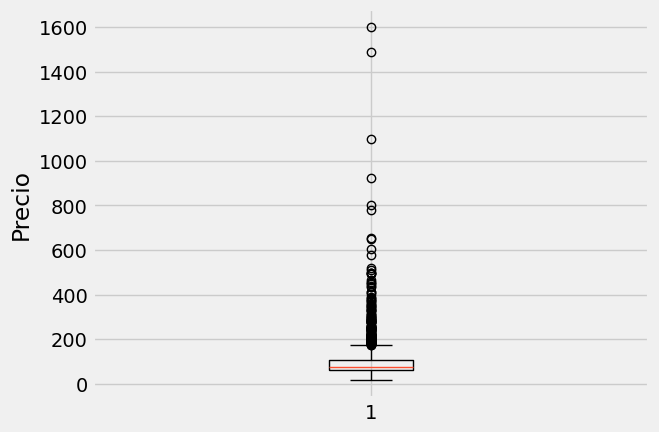

In [430]:
plt.boxplot(df['Precio'])

# Etiqueta del eje y
plt.ylabel('Precio')

# Mostrar el diagrama de caja
plt.show()

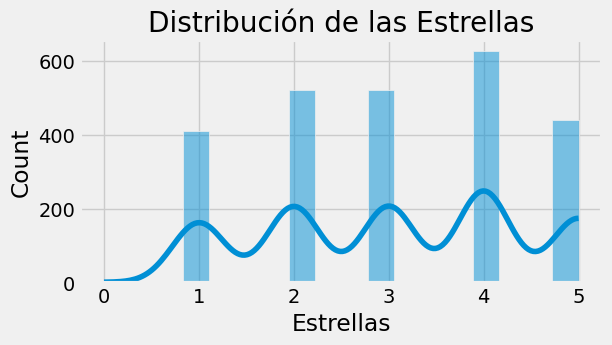

In [431]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Estrellas', kde=True,ax=ax)
ax.set_title("Distribución de las Estrellas")
ax.set_xlabel('Estrellas');

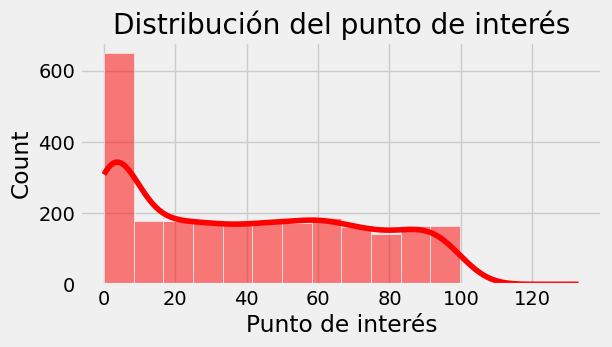

In [432]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Punto de interés', color='red', kde=True,ax=ax)
ax.set_title("Distribución del punto de interés")
ax.set_xlabel('Punto de interés');

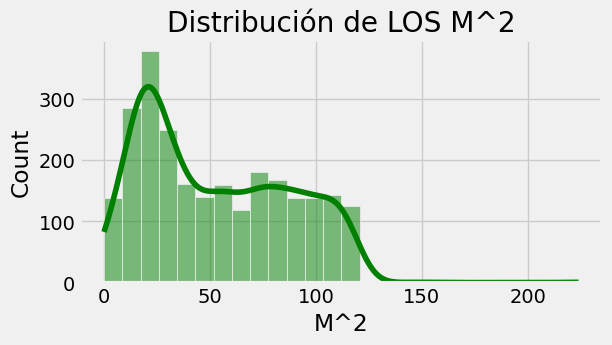

In [433]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='M^2', kde=True,color='green',ax=ax)
ax.set_title("Distribución de LOS M^2")
ax.set_xlabel('M^2');

In [434]:
df.loc[df['Ciudad'] == 'Acoruña', 'Ciudad'] = 'A coruña'
df.loc[df['Parking'] == ' NO', 'Parking'] = 'NO'
df.loc[df['Tipo de cama'] == '2D/2I', 'Tipo de cama'] = '1D/2I'
df.loc[df['Tipo de cama'] == '2D/2D', 'Tipo de cama'] = '1D/2I'
df.loc[df['Tipo de cama'] == '1D/2D', 'Tipo de cama'] = '1D/2I'

## Probando diferentes modelos

### Primer modelo

Lo que primero hay que realizar es separar las variables que necesitamos para realizar el modelo de la **variable objetivo**. Los dataframes serán X, el que entrenaremos (en todos los casos) e y el dataframe que pertenece a la variable objetivo.

In [488]:
# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo

Se va a realizar es una transformación en los datos con la función *LabelEncoder*. Lo que realiza esta función (dicho fácilmente), es ortogar un número aleatorio a una variable categórica, por ejemplo, a la columna de Ciudad, se lo ortoga el número 1 a Barcelona (es un ejemplo!), y así sucesivamente. **Esta transformación se realiza para todas aquellas columnas categóricas**. 

In [489]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

Se empieza realizando una **regresión lineal múltiple**. Es una clase de regresión lineal que se utiliza para ajustar un modelo lineal a un conjunto de datos de entrenamiento y hacer predicciones en un conjunto de datos de prueba.

Esta función utiliza el método de **mínimos cuadrados ordinarios** para ajustar una línea recta a los datos de entrenamiento. 
Debemos de saber que si nuestra regresión no forma, una línea recta, el modelo no va ajustar bien los datos y por tanto, no va a salir un buen modelo. 


In [490]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear un objeto de modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando R2 y MSE
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2:  0.16012446839776984
MSE:  9093.039558455783


Nos fijamos en el valor de R^2, este valor tiene un rango de [0,1] y cuánto más cerca de 1 esté mejor predice nuestro modelo. 

Se observa que el valor de R^2 de este modelo es muy bajo, esto puede pasar porque los datos no se distribuyen de una manera lineal y por eso el modelo no se ajuta bien a ellos. *Nota*: es lo que se piensa.

Con cada modelo que se realize se va a crear una predicción. Esta será:

Un hotel en Mallorca, relativamente cerca de la ciudad, con una habitación de 31 metros cuadrados, las reseñas que le ortoga Google son buenas, sin piscina, con parking, terraza, aire y wifi, con la playa a 6.8 kilómetros y con habitación con cama doble. 

In [491]:
nuevo_dato = np.array([3, 4,100,0,0,1,1,1,1,6.8,0,82]).reshape(1, -1)

# Luego, pasas tus datos al modelo para hacer la predicción
prediccion = model.predict(nuevo_dato)

# La variable "prediccion" contendrá el valor predicho por el modelo para tus datos
prediccion


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([151.6131239])

El modelo de regresión lineal múltiple le ortoga un precio de 138.88€ al hotel. 

### Segundo modelo

Anteriormente se ha comentado que igual la regresión lineal múltiple no se ajustaba bien porque los datos no son lineales. Así que se va a realizar otro modelo. Va a seguir la función **PolynomialFeatures** que se utiliza para generar nuevas características polinomiales a partir de las características originales de un conjunto de datos.

Lo que realmente hace esta función es tranformar las características originales a un conjunto de mayor grado. Si la característica es x, la función crea una nueva característica x^2. Esto permite modelar relaciones no lineales entre las características y la variable objetivo.


Se vuelve a cargar la base de datos para que no interfiera el modelo pasado.

In [495]:
# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo

Se vuelve a realizar la misma transformación de los datos con la función *LabelEncoder*.

In [496]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un objeto de modelo de regresión polinomial de segundo grado

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento

modelo.fit(X_train_poly, y_train)

# Hacer predicciones con el modelo

y_pred = modelo.predict(X_test_poly)

# Calcular el R^2 y el error cuadrático medio de las predicciones

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 0.403690128663014
MSE: 2549.0689758565372


El valor del R^2 a crecido bastante respecto al anterior, así que se puede decir con certeza que el modelo con la función polinómica aumenta la eficacia de este. 


Se va a predecir: 

Un hotel en Mallorca, relativamente cerca de la ciudad, con una habitación de 31 metros cuadrados, las reseñas que le ortoga Google son buenas, sin piscina, con parking, terraza, aire y wifi, con la playa a 6.8 kilómetros y con habitación con cama doble. 

In [498]:
# Crear un conjunto de datos de prueba para hacer predicciones
X_prueba = np.array([[3, 4,100,0,0,1,1,1,1,6.8,0,82]])

# Transformar los datos de prueba utilizando PolynomialFeatures
X_prueba_poly = poly.transform(X_prueba)

# Hacer predicciones con el modelo
y_prueba_pred = modelo.predict(X_prueba_poly)

# Ver las predicciones resultantes
print(y_prueba_pred)

[130.3453519]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Esta función otorga un valor de 127.40€ al hotel. Observamos un cambio de 8.99%, no es un valor relativamente grande, pero es un cambio. 

### Tercer modelo

Se va a realizar un **modelo de regresión utilizando un algoritmo de Random Forest**.

Estes un método de aprendizaje automático supervisado. Realiza un conjunto de árboles de decisión, donde cada árbol se entrena con una muestra aleatoria de los datos y utiliza una selección aleatoria de características. 

La función contiene unos parámetros.
*  **N_estimators**: Indica el número de árboles de decisión en el bosque.
*  **Max_depth**: Controla la profundidad máxima de cada árbol.
*  **Random_state**: Establece una semilla para la generación de números aleatorios.


Se vuelve a cargar la base de datos, y se separa en dos dataframes como se ha comentado antes. 

In [499]:
# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo


In [500]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [501]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear un objeto de modelo de regresión de bosques aleatorios
model2 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=123)

# Entrenar el modelo en los datos de entrenamiento
model2.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model2.predict(X_test)

# Evaluar el modelo utilizando R2 y MSE
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2:  0.45065933716119366
MSE:  5947.519829196942


El valor de R^2 ha aumentado hasta el valor de 0.45. Por tanto, este modelo se ajusta mejor al modelo. 

Vamos a ver si el hecho de aumentar este valor el precio de la predicción varía. 

In [502]:
nuevo_dato = np.array([3, 4,100,0,0,1,1,1,1,6.8,0,82]).reshape(1, -1)

# Luego, pasas tus datos al modelo para hacer la predicción
prediccion2 = model2.predict(nuevo_dato)

# La variable "prediccion" contendrá el valor predicho por el modelo para tus datos
prediccion2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([80.379571])

Aunque este modelo tenga el valor del R^2 más grande, este **no** predice bien. Por tant, se conluye que este modelo está descartado. 

### Cuarto modelo

Para el cuarto modelo se utiliza el **algoritmo de XGBoost**, otro algoritmo que utiliza árboles de decisión para la predicción. Este utiliza una técnica 'Boosting' para crear un conjunto de modelos débiles, donde cada modelo intenta corregir los errores del modelo anterior. Así los árboles son capaces de ajustarse a los errores anteriores, creando nuevos árboles con los errores corregidos.


Se vuelve a crear la base de datos. 

In [516]:
# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo

In [517]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [518]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Crear una matriz de datos DMatrix a partir de los datos de entrenamiento y prueba
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Establecer los parámetros del modelo
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Entrenar el modelo
model3 = xgb.train(params, dtrain, num_boost_round=100)

# Realizar predicciones en los datos de prueba
y_pred = model3.predict(dtest)

# Evaluar el modelo utilizando R2 y MSE
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))


R2:  0.49006329236082324
MSE:  5520.906944420648


Este modelo ha conseguido un 0.5 de R^2, de momento se concluye que es el mejor de los anteriores.

Para realizar la siguiente predicción es necesario la creación de una matriz. Ya que el modelo exige matrices. 

In [520]:
import xgboost as xgb

# Crear una lista con los valores de las variables
new_data = [[3, 4, 100, 0, 0, 1, 1, 1, 1, 6.8, 0, 82]]

# Crear un dataframe a partir de la lista de valores
X_new = pd.DataFrame(new_data, columns=['Kimc', 'Estrellas', 'M^2', 'Resenas', 'Piscina', 'Parking', 'Terraza', 'Aire', 'Wifi', 'Punto de interés', 'Tipo de cama', 'Ciudad'])

# Crear una matriz de datos DMatrix a partir del nuevo dataframe
dnew = xgb.DMatrix(X_new)

# Realizar predicciones con el modelo
y_pred = model3.predict(dnew)

# Imprimir las predicciones
print(y_pred)


[112.60076]


El modelo ha ortogado un valor de 112.60€ al hotel.

### Quinto modelo

In [526]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo


# división de conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocesamiento de características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# preprocesamiento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# identificación de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# preprocesamiento de características mediante ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# selección de modelo
model4 = RandomForestRegressor()

# construcción del pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model4)])

# entrenamiento del modelo
clf.fit(X_train, y_train)

# evaluación del modelo
y_pred = clf.predict(X_test)
print('R^2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R^2: 0.6753666469311196
MSE: 1534.9249246765053


In [527]:
nuevo_dato = np.array([3, 4,100,0,0,1,1,1,1,6.8,0,82]).reshape(1, -1)

# Luego, pasas tus datos al modelo para hacer la predicción
prediccion4 = model4.predict(nuevo_dato)

# La variable "prediccion" contendrá el valor predicho por el modelo para tus datos
prediccion4

ValueError: ignored

### Sexto modelo

In [337]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error

# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


# división de conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocesamiento de características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# preprocesamiento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# identificación de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# preprocesamiento de características mediante ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# construcción del modelo de redes neuronales
model = Sequential([
    Dense(32, input_shape=(preprocessor.fit_transform(X_train).shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# compilación del modelo
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# entrenamiento del modelo
model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, verbose=1)

# evaluación del modelo
y_pred = model.predict(preprocessor.transform(X_test))
print('R^2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Epoch 1/50
64/64 [==============================] - 1s 2ms/step - loss: 15598.1416
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 14762.4512
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 12719.2178
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 9457.7246
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 6626.7207
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 5443.7529
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 5161.8755
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 5063.7158
Epoch 9/50
64/64 [==============================] - 0s 2ms/step - loss: 5000.2856
Epoch 10/50
64/64 [==============================] - 0s 2ms/step - loss: 4961.9844
Epoch 11/50
64/64 [==============================] - 0s 2ms/step - loss: 4931.2090
Epoch 12/50
64/64 [==============================] - 0s 2ms/step - loss: 4900.9463
Epoch 13/5

In [531]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error

# Separar la variable objetivo de las características
X = df.drop('Precio', axis=1)  # características
y = df['Precio']  # variable objetivo


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns: #Cambiar los strings del dataframe de x
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


# división de conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocesamiento de características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# preprocesamiento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# identificación de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# preprocesamiento de características mediante ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# construcción del modelo de redes neuronales
model = Sequential([
    Dense(64, input_shape=(preprocessor.fit_transform(X_train).shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# compilación del modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
# entrenamiento del modelo
model.fit(preprocessor.fit_transform(X_train), y_train, epochs=50, batch_size=32, verbose=1)

# evaluación del modelo
y_pred = model.predict(preprocessor.transform(X_test))
print('R^2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Epoch 1/50
64/64 [==============================] - 2s 4ms/step - loss: 15152.8096 - mean_absolute_error: 91.0884
Epoch 2/50
64/64 [==============================] - 0s 5ms/step - loss: 13353.2920 - mean_absolute_error: 81.9596
Epoch 3/50
64/64 [==============================] - 0s 5ms/step - loss: 10709.1533 - mean_absolute_error: 66.9185
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 7801.6367 - mean_absolute_error: 48.7358
Epoch 5/50
64/64 [==============================] - 0s 5ms/step - loss: 5775.5151 - mean_absolute_error: 36.1560
Epoch 6/50
64/64 [==============================] - 0s 4ms/step - loss: 5110.5591 - mean_absolute_error: 33.7409
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 4986.9399 - mean_absolute_error: 33.6488
Epoch 8/50
64/64 [==============================] - 0s 4ms/step - loss: 4938.4419 - mean_absolute_error: 33.3615
Epoch 9/50
64/64 [==============================] - 0s 4ms/step - loss: 4900.1748 - mean_abso